In [34]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('BankNote_Authentication.csv')

In [3]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

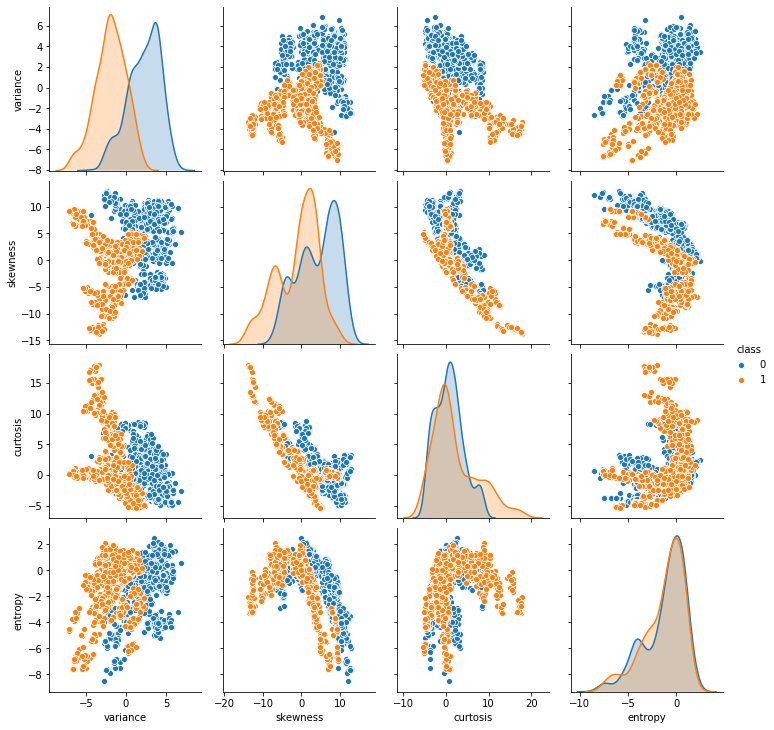

In [35]:
sns.pairplot(df,hue='class')

In [14]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [15]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split


In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)


In [19]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
from sklearn.tree import DecisionTreeClassifier
decisionTreeClassifier = DecisionTreeClassifier()
decisionTreeClassifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
y_pred_randomForest=classifier.predict(X_test)
y_pred_decisionTree=decisionTreeClassifier.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
score_random_forest=accuracy_score(y_test,y_pred_randomForest)
score_decision_tree=accuracy_score(y_test,y_pred_decisionTree)

In [33]:
score_decision_tree


0.9805825242718447

In [36]:
score_random_forest

0.9902912621359223

In [37]:
import pickle
pickle_out = open("randomForestClassifier.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()


In [38]:
pickle_out = open("decisionTreeClassifier.pkl","wb")
pickle.dump(decisionTreeClassifier, pickle_out)
pickle_out.close()